In [2]:
import sys
sys.path.append('/home/igudich/work/mantid-benchmarks/python/')

In [3]:
from timestamp_tree import *
import dictionary_tree as dtree
from generic_tree import Node

START_POINT: 1540283199583032615 ns. from starting from epoch.
'SNSPowderReduction 0' is on level: 0; start offset 7082062460 ns; end offset 274280975812 ns;
'AlignAndFocusPowderFromFiles 1' is on level: 1; start offset 7195654711 ns; end offset 60619551929 ns;
'Load 2' is on level: 2; start offset 7471917373 ns; end offset 17417511867 ns;
'LoadEventNexus 3' is on level: 3; start offset 8010366570 ns; end offset 17416334468 ns;
'LoadNexusLogs 4' is on level: 4; start offset 8011563360 ns; end offset 8310877402 ns;
'LoadInstrument 5' is on level: 4; start offset 8407113091 ns; end offset 8577594923 ns;
'LoadParameterFile 6' is on level: 5; start offset 8552280144 ns; end offset 8577238415 ns;
'PDDetermineCharacterizations 7' is on level: 2; start offset 17422026281 ns; end offset 17435293350 ns;
'FilterBadPulses 8' is on level: 2; start offset 17436621409 ns; end offset 24013913426 ns;
'FilterByLogValue 9' is on level: 3; start offset 17556729706 ns; end offset 23990408045 ns;
'AlignAnd

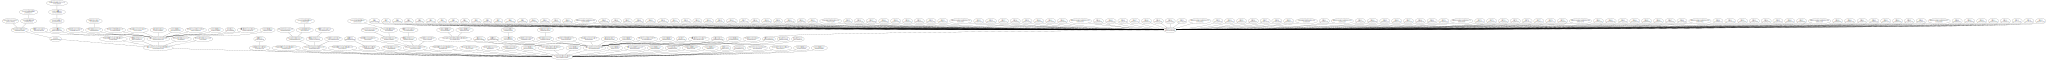

In [5]:
filename = "/home/igudich/work/MyMantid/mantid/cmake-build-release/bin/algotimeregister.out"
header, records = fromFile(filename)
print(header, "ns. from starting from epoch.")
records = [x for x in records if x["finish"] - x["start"] > 3000000]
trees = toTrees(records)
for node in trees[0].to_list():
    print("'{}'".format(node.info[0]), "is on level: {};".format(node.level) , "start offset {} ns;".format(node.info[1]), "end offset {} ns;".format(node.info[2]))
trees[0].to_dot(displayFunc=lambda x: x[0] + "\n" + str(x[2] - x[1]))

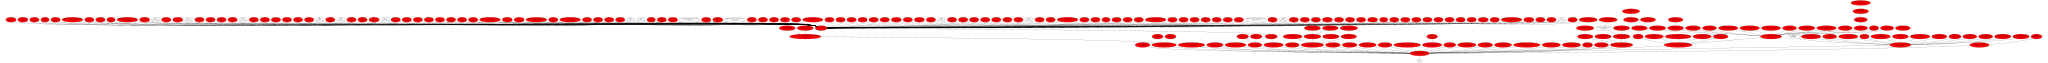

In [18]:
#use dctTree for complex manipulations
dtree.toDot(dtree.extractChilds(to_dct_tree(trees[0])), lambda x: x > 5000000)

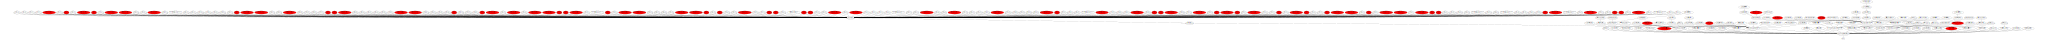

In [19]:
header, dctTree = loadFile(filename) 
dtree.toDot(dctTree, lambda x: x < 5000000)